# 6-9. ÌîÑÎ°úÏ†ùÌä∏: CAMÏùÑ ÎßåÎì§Í≥† ÌèâÍ∞ÄÌï¥ Î≥¥Ïûê

**ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†Ñ ÌôïÏù∏ÌïòÍ∏∞**

ÏÇ¨Ïö©Ìï† ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†ÑÏùÑ ÌôïÏù∏Ìï¥Î¥êÏöî

In [ ]:
# Ïª§ÎÑê Ïû¨ÏãúÏûë Ïù¥ÌõÑ Ïã§ÏäµÏùÑ ÏúÑÌï¥, Ïù¥Ï†Ñ Ïä§ÌÖùÏùò ÏΩîÎìúÎ•º Î™®ÏïÑÏÑú ÌïúÍ∫ºÎ≤àÏóê Ïã§ÌñâÌï©ÎãàÎã§.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import copy
import cv2
from PIL import Image

print(tf.__version__)
print(np.__version__)
print(cv2.__version__)
print(Image.__version__)

2.8.0
1.21.5
4.1.2
7.1.2


# **CAM Íµ¨ÌòÑÌïòÍ∏∞**

1) Ïù¥Î≤à ÎÖ∏ÎìúÏóê ÎÇòÏôîÎçò CAMÏùÑ ÏßÅÏ†ë Íµ¨ÌòÑÌï¥ Î¥ÖÏãúÎã§. ÏòàÏ†ú ÏΩîÎìúÎ•º ÏµúÎåÄÌïú Î≥¥ÏßÄ ÎßêÍ≥†, ÏÑ§Î™ÖÍ≥º Ïù¥Î°†ÏùÑ Î≥¥Í≥† Íµ¨ÌòÑÌï¥ Î≥¥ÏÑ∏Ïöî.
```
def generate_cam(model, item):
    cam_image = None
    # TODO: generate cam image
    return cam_image
```



In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)

def normalize_and_resize_img(input):
    # Normalizes images: `uint8` -> `float32`
    image = tf.image.resize(input['image'], [224, 224])
    input['image'] = tf.cast(image, tf.float32) / 255.
    return input['image'], input['label']

def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=2
    )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

print('Ïäù=3')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteV3A7K3/stanford_dogs-train.tfrecord


  0%|          | 0/12000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteV3A7K3/stanford_dogs-test.tfrecord


  0%|          | 0/8580 [00:00<?, ? examples/s]

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.
Ïäù=3


- Ïù¥Ï†ú ÌïôÏäµÎêú Î™®Îç∏ÏóêÏÑú CAMÏùÑ ÏÉùÏÑ±ÌïòÍ∏∞ Ï†ÑÏóê, CAM ÏÉùÏÑ± ÏûëÏóÖÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖã Î∞∞Ïπò Îã®ÏúÑÍ∞Ä ÏïÑÎãàÎùº **Í∞úÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ Îã®ÏúÑÎ°ú** Ïù¥Î£®Ïñ¥ÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê, `get_one()` Ìï®ÏàòÎ°ú Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ìïú Ïû•Ïî© ÎΩëÏùÑ Ïàò ÏûàÎèÑÎ°ù ÎßåÎì§Ïñ¥ Ï§ÄÎã§.

In [ ]:
def get_one(ds):
    ds = ds.take(1)
    sample_data = list(ds.as_numpy_iterator())
    bbox = sample_data[0]['objects']['bbox']
    image = sample_data[0]['image']
    label = sample_data[0]['label']
    return sample_data[0]

print('Ïäù=3')

Ïäù=3


40


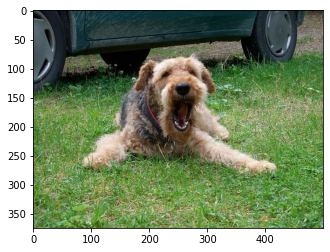

In [ ]:
item = get_one(ds_test)
print(item['label'])
plt.imshow(item['image'])
plt.show()

- Ïù¥ ÏÇ¨ÏßÑÏùò ÎùºÎ≤®ÏùÄ `108`Ïù¥Îã§.

- Îç∞Ïù¥ÌÑ∞Í∞Ä Ï§ÄÎπÑÎêòÏóàÏúºÎãà CAMÏùÑ ÏÉùÏÑ±ÌïòÍ∏∞ ÏúÑÌï¥ ÎØ∏Î¶¨ Ï§ÄÎπÑÎêú ÌïôÏäµÌïú Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò®Îã§.

In [ ]:
import os
cam_model_path = '/content/drive/MyDrive/·Ñã·Ö°·Ñã·Öµ·Ñë·Ö¶·ÜØ/GOING DEEPER/data/class_activation_map/data/cam_model1.h5'
cam_model = tf.keras.models.load_model(cam_model_path)
print('Ïäù=3')

Ïäù=3


CAMÏùÑ ÏÉùÏÑ±ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî 

**(1) ÌäπÏÑ± Îßµ** <br>
**(2) ÌÅ¥ÎûòÏä§Î≥Ñ ÌôïÎ•†ÏùÑ ÏñªÍ∏∞ ÏúÑÌïú ÏÜåÌîÑÌä∏Îß•Ïä§ Î†àÏù¥Ïñ¥Ïùò Í∞ÄÏ§ëÏπò**<br>
**(3) ÏõêÌïòÎäî ÌÅ¥ÎûòÏä§Ïùò Ï∂úÎ†•Í∞í**Ïù¥ ÌïÑÏöîÌïòÎã§.

- Îòê Ïù¥ÎØ∏ÏßÄÏóêÏÑú <u>Î™®Îç∏Ïù¥ Ïñ¥Îñ§ Î∂ÄÎ∂ÑÏùÑ Î≥¥ÎäîÏßÄ ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú ÌôïÏù∏ÌïòÎ†§Î©¥</u> ÎÑ§Ìä∏ÏõåÌÅ¨ÏóêÏÑú ÎÇòÏò® **CAMÏùÑ ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÏôÄ Í∞ôÍ≤å ÎßåÎì§Ïñ¥ Ìï®Íªò ÏãúÍ∞ÅÌôî**Ìï¥Ïïº ÌïúÎã§.
- Ïù¥Î•º Í≥†Î†§Ìï¥ÏÑú `model`Í≥º `item`ÏùÑ Î∞õÏïòÏùÑ Îïå <u>ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄÏôÄ ÎèôÏùºÌïú ÌÅ¨Í∏∞</u>Ïùò CAMÏùÑ Î∞òÌôòÌïòÎäî Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥ Ï§ÄÎã§.

<br>

- `generate_cam()` ÏùÑ Íµ¨ÌòÑÌïòÍ∏∞ ÏúÑÌï¥ ÏïÑÎûòÏóêÏÑúÎäî `conv_ouputs`ÏôÄ Í∞ôÏù¥ <u>ÌäπÏ†ï Î†àÏù¥Ïñ¥Ïùò Í≤∞Í≥ºÍ∞íÏùÑ outputÏúºÎ°ú Î∞õÍ∏∞ ÏúÑÌï¥ ÏÉàÎ°úÏö¥ Î™®Îç∏ÏùÑ Ï†ïÏùò</u>ÌïòÍ≥†, feedforwardÎ•º Í±∞Ïπú ÌõÑ CAMÏùÑ Í≥ÑÏÇ∞ÌïòÎèÑÎ°ù Íµ¨ÌòÑÌïúÎã§.
- ÎßàÏßÄÎßâÏóêÎäî ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Ïóê ÎßûÏ∂∞ CAMÏùÑ `resize`

In [ ]:
def generate_cam(model, item):
    item = copy.deepcopy(item)
    width = item['image'].shape[1]  # Ïó¥
    height = item['image'].shape[0] # Ìñâ
    
    img_tensor, class_idx = normalize_and_resize_img(item)     # (1)

    # print(img_tensor)
    # print(class_idx)
    
    # ÌïôÏäµÌïú Î™®Îç∏ÏóêÏÑú ÏõêÌïòÎäî LayerÏùò outputÏùÑ ÏñªÍ∏∞ ÏúÑÌï¥ÏÑú Î™®Îç∏Ïùò inputÍ≥º outputÏùÑ ÏÉàÎ°≠Í≤å Ï†ïÏùòÌï¥Ï§çÎãàÎã§.
    # model.layers[-3].outputÏóêÏÑúÎäî Ïö∞Î¶¨Í∞Ä ÌïÑÏöîÎ°ú ÌïòÎäî GAP Ïù¥Ï†Ñ Convolution layerÏùò outputÏùÑ ÏñªÏùÑ Ïàò ÏûàÏäµÎãàÎã§.
    cam_model = tf.keras.models.Model([model.inputs], [model.layers[-3].output, model.output])       # (2) 
    conv_outputs, predictions = cam_model(tf.expand_dims(img_tensor, 0))    # axis=0ÏùºÎïå, Îß® ÏïûÏùò Ï∞®ÏõêÏùÑ ÎäòÎ¶∞Îã§.    # (3)
    
    # print(conv_outputs)

    conv_outputs = conv_outputs[0, :, :, :]
    class_weights = model.layers[-1].get_weights()[0]   #ÎßàÏßÄÎßâ Î™®Îç∏Ïùò weight activationÏùÑ Í∞ÄÏ†∏ÏòµÎãàÎã§.    # (4)

    # print(class_weights)
    # print(class_weights.shape)
    
    cam_image = np.zeros(dtype=np.float32, shape=conv_outputs.shape[0:2])
    for i, w in enumerate(class_weights[:, class_idx]):         
        # W * f Î•º ÌÜµÌï¥ classÎ≥Ñ activation mapÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
        cam_image += w * conv_outputs[:, :, i]         # (5)
        
    # print(cam_image)

    cam_image /= np.max(cam_image) # activation scoreÎ•º normalizeÌï©ÎãàÎã§.
    cam_image = cam_image.numpy()
    cam_image = cv2.resize(cam_image, (width, height)) # ÏõêÎûò Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î°ú resizeÌï©ÎãàÎã§.
    return cam_image

print('Ïäù=3')

Ïäù=3


|Î≤àÌò∏|ÏΩîÎìú Î∞è Î≥ÄÏàò|ÏÑ§Î™Ö|
|:---:|:---|:---|
|1|`img_tensor`|shape=(224, 224, 3)|
|2|`tf.keras.models.Model(input, output)`|inputÍ≥º outputÏùÑ ÎÑ£Ïñ¥Ï§ÄÎã§.|
||`[model.layers[-3].output, model.output]`|conv layerÏùò output(feature map)Í≥º Ï†ÑÏ≤¥ Î™®Îç∏Ïùò output(classification) Îëê Í∞ÄÏßÄ Î™®ÎëêÎ•º **cam_modelÏùò output**ÏúºÎ°ú ÎÑ£Ïñ¥Ï§ÄÎã§.|
|3|`tf.expand_dims(image, axis=0)`|Î∞∞Ïó¥Ïùò Ï∞®ÏõêÏùÑ ÎäòÎ¶¨Îäî Î©îÏÑúÎìú. **axis=0**Ïù¥Î©¥ (224, 224, 3) üëâ **(1, 224, 224, 3)**|
||`conv_outputs`|shape=(1, 7, 7, 2048) üëâ Î∞îÎ°ú Îã§Ïùå Ï§ÑÏóêÏÑú (0, 7, 7, 2048)Î°ú Î≥ÄÍ≤Ω. Í∑∏ÎÉ• (7,7,2048)Í≥º Í∞ôÎã§|
|4|`class_weights`|activation mapÏóêÏÑú Í∞Å ÌîΩÏÖÄÎ≥Ñ Í∞ÄÏ§ëÏπòÎ•º 2Ï∞®Ïõê Î∞∞Ïó¥Î°ú ÎßåÎì§Ïñ¥ÏÑú Î≥ÄÏàòÏóê Ìï†Îãπ. <br> shape = (2048, 120) üëâ **2048Ïû•Ïùò feature map(Ï±ÑÎÑê)**Í≥º **120Í∞úÏùò ÎùºÎ≤®Ïù¥ ÏûàÏùå**ÏùÑ Ïïå Ïàò ÏûàÎã§. <br>Î∞îÎ°ú Îí§Ïùò forÎ¨∏ÏóêÏÑú `class_weights[:, class_idx]`ÏùÄ Í∞Å feature mapÏóêÏÑú `class_idx` ÌÅ¥ÎûòÏä§ ÎùºÎ≤®Ïóê Ìï¥ÎãπÌïòÎäî <br>Í∞ÄÏ§ëÏπòÎßå ÎΩëÏïÑÎÇ¥Îäî ÏΩîÎìúÏù¥Îã§. |
|5|`cam_image`|shape = (7, 7) ÌÅ¨Í∏∞Ïùò ÌÖêÏÑú (`conv_outputs`Ïùò 0, 1Î≤àÏß∏ Ï∞®ÏõêÎßå Í∞ÄÏ†∏ÏôîÏúºÎØÄÎ°ú) üëâ shape=(375, 500)ÏúºÎ°ú resizeÌïúÎã§. Ïù¥ÎØ∏ÏßÄ ÏõêÎûò ÌÅ¨Í∏∞|

<br>

üëá `cam_model.summary()`Î•º ÌñàÏùÑ Îïå, ÎßàÏßÄÎßâ Î†àÏù¥Ïñ¥ ÌôïÏù∏

![](https://media.vlpt.us/images/seona056/post/df5752fb-dcf0-4b17-b02d-a137a0bef2f1/image.png)

<br>

- ÎßàÏßÄÎßâ `dense layer`ÏóêÏÑúÎèÑ **Ï∂úÎ†•Ïù¥ 120**Ïù∏ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
- ÏõêÎûò Î∂ÑÎ•ò (classification) Î™®Îç∏Ïù¥ÎØÄÎ°ú, ÎùºÎ≤®Ïù¥ **120Í∞ú**ÎùºÎäî Í≤ÉÏùÑ Îã§Ïãú Ìïú Î≤à ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

2) ÎßåÎì† Ìï®ÏàòÎ°ú CAM Ïù¥ÎØ∏ÏßÄÎ•º ÏÉùÏÑ±Ìï©ÏãúÎã§.
```
cam_image = generate_cam(cam_model, item)
plt.imshow(cam_image)
```



- ÏúÑÏóêÏÑú ÏûëÏÑ±Ìïú Ìï®ÏàòÎ•º Ïã§ÌñâÌïòÎ©¥ ÏïÑÎûòÏôÄ Í∞ôÏùÄ CAMÏùÑ ÏñªÏùÑ Ïàò ÏûàÎã§. 
- ÏÉùÍ∞ÅÎ≥¥Îã§ ÏúÑÏπòÎ•º Ï†ïÌôïÌïòÍ≤å ÌëúÌòÑÌïúÎã§.

<br>

**‚òù epoch=2Î°ú ÌïôÏäµÌïú Î™®Îç∏ ÏÇ¨Ïö©**

(375, 500)


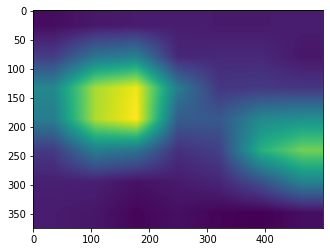

In [ ]:
cam_image = generate_cam(cam_model, item)
print(cam_image.shape)
plt.imshow(cam_image)
plt.show()

**‚úå epoch=8Î°ú ÌïôÏäµÌïú Î™®Îç∏ ÏÇ¨Ïö©**

(375, 500)


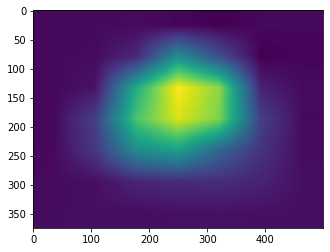

In [ ]:
cam_image = generate_cam(cam_model, item)
print(cam_image.shape)
plt.imshow(cam_image)
plt.show()

3) ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏôÄ CAM Ïù¥ÎØ∏ÏßÄÎ•º ÏûÖÎ†•ÏúºÎ°ú Î∞õÍ≥† Îëê Í∞úÏùò Ïù¥ÎØ∏ÏßÄÏùò Ìà¨Î™ÖÎèÑÎ•º Ï°∞Ï†ï, ÌïòÎÇòÏùò Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏõêÎ≥∏Í≥º CAMÏùÑ Í≤πÏ≥ê Î≥¥Ïó¨Ï£ºÎäî `visualize_cam_on_image()` Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥Î≥¥ÏÑ∏Ïöî.

<br>

- [webnautesÎãòÏùò OpenCV Python Í∞ïÏ¢å - Îëê Í∞úÏùò Ïù¥ÎØ∏ÏßÄ ÎçîÌïòÍ∏∞, Î∏îÎ†åÎî©](https://webnautes.tistory.com/1245)

<br>

```
def visualize_cam_on_image(image, cam_image):
    # TODO: blend image
    merged_image = None
    return merged_image
```
```
# visualize_cam_on_image() Ìï®Ïàò ÏÇ¨Ïö©

type(item['image'].numpy())

origin_image = item['image'].numpy().astype(np.uint8)
cam_image_3channel = np.stack([cam_image*255]*3, axis=-1).astype(np.uint8)

blended_image = visualize_cam_on_image(cam_image_3channel, origin_image)
plt.imshow(blended_image)
```

- CAM Ïù¥ÎØ∏ÏßÄÎ•º ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏôÄ Ìï©Ï≥êÎ≥∏Îã§.
- ÏòàÏ†úÏóêÏÑúÎäî `cam_image`Ïùò alphaÍ∞íÏùÑ 0.5Î°ú ÏÑ§Ï†ïÌñàÎäîÎç∞, **0.7**Î°ú Î≥ÄÍ≤Ω

In [ ]:
def visualize_cam_on_image(src1, src2, alpha=0.7):
    beta = (1.0 - alpha)
    merged_image = cv2.addWeighted(src1, alpha, src2, beta, 0.0)
    return merged_image

print('Ïäù=3')

Ïäù=3


**‚òù epoch=2Î°ú ÌïôÏäµÌïú Î™®Îç∏ ÏÇ¨Ïö©**

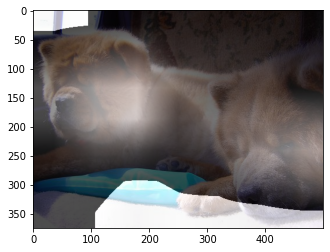

In [ ]:
origin_image = item['image'].astype(np.uint8)
cam_image_3channel = np.stack([cam_image*255]*3, axis=-1).astype(np.uint8)
# print(cam_image*255)
# print(cam_image_3channel.shape)

blended_image = visualize_cam_on_image(cam_image_3channel, origin_image)
plt.imshow(blended_image)
plt.show()

- Îëê ÎßàÎ¶¨ Í∞ïÏïÑÏßÄÏùò ÏñºÍµ¥Ïóê camÏù¥ ÌëúÏãúÎêú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

**‚úå epoch=8Î°ú ÌïôÏäµÌïú Î™®Îç∏ ÏÇ¨Ïö©**

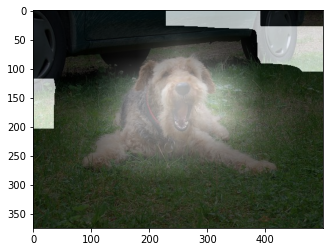

In [ ]:
origin_image = item['image'].astype(np.uint8)
cam_image_3channel = np.stack([cam_image*255]*3, axis=-1).astype(np.uint8)

blended_image = visualize_cam_on_image(cam_image_3channel, origin_image)
plt.imshow(blended_image)
plt.show()

- epoch=2ÏóêÏÑú Í∞ïÏïÑÏßÄ ÏñºÍµ¥ÏóêÎßå camÏù¥ ÌëúÏãúÎêú Í≤ÉÍ≥º ÎπÑÍµêÌï¥ÏÑú, Ï¢Ä Îçî Í∞ïÏïÑÏßÄ Î™∏ Ï†ÑÏ≤¥Ïóê camÏù¥ ÌëúÏãúÎêú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

# Grad-CAM Íµ¨ÌòÑÌïòÍ∏∞

1) Ïù¥Î≤à ÎÖ∏ÎìúÏóê ÎÇòÏôîÎçò Grad-CAMÏùÑ ÏßÅÏ†ë Íµ¨ÌòÑÌï¥ Î¥ÖÏãúÎã§. ÏòàÏ†ú ÏΩîÎìúÎ•º ÏµúÎåÄÌïú Î≥¥ÏßÄ ÎßêÍ≥†, ÏÑ§Î™ÖÍ≥º Ïù¥Î°†ÏùÑ Î≥¥Í≥† Íµ¨ÌòÑÌï¥ Î≥¥ÏÑ∏Ïöî.
```
def generate_grad_cam(model, activation_layer, item):
    grad_cam_image = None
    # TODO: generate grad_cam_image

    return grad_cam_image
```



- ÏÉàÎ°úÏö¥ Ïù¥ÎØ∏ÏßÄÎ•º ÎΩëÏïÑ Î≥∏Îã§.

40


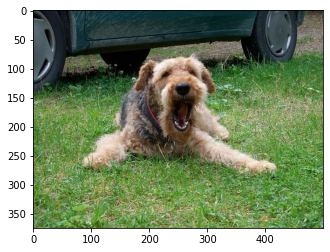

In [ ]:
item = get_one(ds_test)
print(item['label'])
plt.imshow(item['image'])
plt.show()






- `grad_cam`ÏùÄ **Í¥ÄÏ∞∞ÏùÑ ÏõêÌïòÎäî Î†àÏù¥Ïñ¥**ÏôÄ **Ï†ïÎãµ ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú ÏòàÏ∏°Í∞í** ÏÇ¨Ïù¥Ïùò <u>Í∑∏ÎûòÎîîÏñ∏Ìä∏Î•º Íµ¨ÌïòÍ≥†, Ïó¨Í∏∞Ïóê GAP Ïó∞ÏÇ∞ÏùÑ Ï†ÅÏö©Ìï®</u>ÏúºÎ°úÏç® Í¥ÄÏ∞∞ ÎåÄÏÉÅÏù¥ ÎêòÎäî Î†àÏù¥Ïñ¥Ïùò **Ï±ÑÎÑêÎ≥Ñ Í∞ÄÏ§ëÏπò**Î•º Íµ¨ÌïúÎã§. 
- ÏµúÏ¢Ö CAM Ïù¥ÎØ∏ÏßÄÎ•º Íµ¨ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Î†àÏù¥Ïñ¥Ïùò Ï±ÑÎÑêÎ≥Ñ Í∞ÄÏ§ëÏπò(`weights`)ÏôÄ Î†àÏù¥Ïñ¥ÏóêÏÑú ÎÇòÏò® Ï±ÑÎÑêÎ≥Ñ ÌäπÏÑ± ÎßµÏùÑ Í∞ÄÏ§ëÌï©Ìï¥Ï£ºÏñ¥ `cam_image`Î•º ÏñªÎäîÎã§. üëâ Ïù¥ Ïó∞ÏÇ∞ÏùÄ CAMÍ≥º ÎèôÏùº

<br>

<u>Î™®Îç∏Ïùò Ï†ÑÏ≤¥ GAP Ïó∞ÏÇ∞ Î∞îÎ°ú Ï†ÑÏùò Î†àÏù¥Ïñ¥Ïùò feature map</u>Í≥º ÏòàÏ∏° ÎùºÎ≤®Ïùò Ï±ÑÎÑêÎ≥Ñ Í∞ÄÏ§ëÏπòÎ•º Í∞ÄÏ§ëÌï© ÌñàÎçò Ïù¥Ï†ÑÏùò CAMÍ≥º Îã¨Î¶¨, Grad-CAMÏùÄ Ïñ¥Îñ§ Î†àÏù¥Ïñ¥Îì† CAM Ïù¥ÎØ∏ÏßÄÎ•º ÎΩëÏïÑÎÇº Ïàò ÏûàÏúºÎØÄÎ°ú, Í∑∏ÎûòÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞ÏùÑ ÏõêÌïòÎäî Í¥ÄÏ∞∞ ÎåÄÏÉÅ Î†àÏù¥Ïñ¥ `activation_layer`Î•º ÎΩëÏïÑÏÑú Ïì∏ Ïàò ÏûàÎèÑÎ°ù `activation_layer`Ïùò Ïù¥Î¶ÑÏùÑ Î∞õÍ≥† Ïù¥Î•º ÌôúÏö©ÌïòÎ©¥ ÎêúÎã§.

<br>

- ÏïÑÎûò `generate_grad_cam()`ÏóêÏÑúÎäî ÏõêÌïòÎäî Î†àÏù¥Ïñ¥Ïùò `output`Í≥º ÌäπÏ†ï ÌÅ¥ÎûòÏä§Ïùò prediction ÏÇ¨Ïù¥Ïùò <u>Í∑∏ÎûòÎîîÏñ∏Ìä∏</u> `grad_val`ÏùÑ ÏñªÍ≥† Ïù¥Î•º `weights`Î°ú ÌôúÏö©ÌïòÎèÑÎ°ù ÌïúÎã§.

In [ ]:
def generate_grad_cam(model, activation_layer, item):
    item = copy.deepcopy(item)
    width = item['image'].shape[1]
    height = item['image'].shape[0]
    img_tensor, class_idx = normalize_and_resize_img(item)
    
    # Grad camÏóêÏÑúÎèÑ camÍ≥º Í∞ôÏù¥ ÌäπÏ†ï Î†àÏù¥Ïñ¥Ïùò outputÏùÑ ÌïÑÏöîÎ°ú ÌïòÎØÄÎ°ú Î™®Îç∏Ïùò inputÍ≥º outputÏùÑ ÏÉàÎ°≠Í≤å Ï†ïÏùòÌï©ÎãàÎã§.
    # Ïù¥Îïå ÏõêÌïòÎäî Î†àÏù¥Ïñ¥Í∞Ä Îã§Î•º Ïàò ÏûàÏúºÎãà Ìï¥Îãπ Î†àÏù¥Ïñ¥Ïùò Ïù¥Î¶ÑÏúºÎ°ú Ï∞æÏùÄ ÌõÑ outputÏúºÎ°ú Ï∂îÍ∞ÄÌï©ÎãàÎã§.
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(activation_layer).output, model.output])
    
    # GradientÎ•º ÏñªÍ∏∞ ÏúÑÌï¥ tapeÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    with tf.GradientTape() as tape:
        conv_output, pred = grad_model(tf.expand_dims(img_tensor, 0))
    
        loss = pred[:, class_idx] # ÏõêÌïòÎäî class(Ïó¨Í∏∞ÏÑúÎäî Ï†ïÎãµÏúºÎ°ú ÌôúÏö©) ÏòàÏ∏°Í∞íÏùÑ ÏñªÏäµÎãàÎã§.
        output = conv_output[0] # ÏõêÌïòÎäî layerÏùò outputÏùÑ ÏñªÏäµÎãàÎã§.
        grad_val = tape.gradient(loss, conv_output)[0] # ÏòàÏ∏°Í∞íÏóê Îî∞Î•∏ LayerÏùò gradientÎ•º ÏñªÏäµÎãàÎã§.

    weights = np.mean(grad_val, axis=(0, 1)) # gradientÏùò GAPÏúºÎ°ú classÎ≥Ñ weightÎ•º Íµ¨Ìï©ÎãàÎã§.
    grad_cam_image = np.zeros(dtype=np.float32, shape=conv_output.shape[0:2])
    for k, w in enumerate(weights):
        # Í∞Å classÎ≥Ñ weightÏôÄ Ìï¥Îãπ layerÏùò outputÏùÑ Í≥±Ìï¥ class activation mapÏùÑ ÏñªÏäµÎãàÎã§.
        grad_cam_image += w * output[:, :, k]
        
    grad_cam_image /= np.max(grad_cam_image)
    grad_cam_image = grad_cam_image.numpy()
    grad_cam_image = cv2.resize(grad_cam_image, (width, height))
    return grad_cam_image

print('Ïäù=3')

Ïäù=3


2) ÎßåÎì† Ìï®ÏàòÎ°ú Ïó¨Îü¨ Î†àÏù¥Ïñ¥Ïùò CAM Ïù¥ÎØ∏ÏßÄÎ•º ÎΩëÏïÑÏÑú ÏßÅÏ†ë ÌôïÏù∏Ìï¥ Î≥¥ÏÑ∏Ïöî.


- Ïó¨Îü¨ Î†àÏù¥Ïñ¥Ïùò feature mapÏùÑ Ï†ÅÏö©Ìï¥ Î≥¥ÏïòÎã§.
- Î†àÏù¥Ïñ¥Ïùò Ïù¥Î¶ÑÏùÄ Ïù¥Ï†Ñ Ïä§ÌÉ≠Ïùò `cam_model.summary()` Í≤∞Í≥ºÏóêÏÑú Ï∞æÏùÑ Ïàò ÏûàÎã§.
- `conv5_block3_3_conv`, `conv5_block3_3_bn`, `conv5_block3_add`, `conv5_block3_out` 
- ÎÑàÎ¨¥ ÏïûÏ™ΩÏùÄ ÌÅ¨Í≤å ÏùòÎØ∏Í∞Ä ÏóÜÏùÑ Í±∞Îùº ÏÉùÍ∞ÅÌñàÍ≥†, Ï∂úÎ†• Ï∞®ÏõêÍ≥º shapeÍ∞Ä ÎèôÏùºÌïú ÎßàÏßÄÎßâ 4Í∞úÏùò Î†àÏù¥Ïñ¥Ïùò outputÏùÑ Ïù¥Ïö©Ìï®.


**‚òù epoch=2Î°ú ÌïôÏäµÌïú Î™®Îç∏ ÏÇ¨Ïö©**

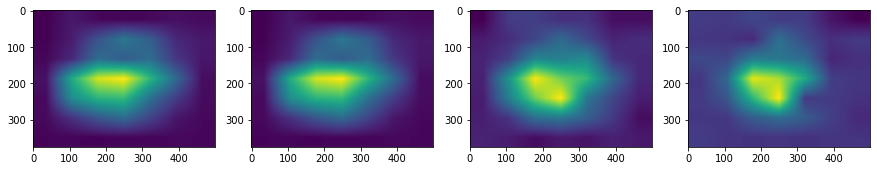

In [ ]:
plt.figure(figsize=(15,30))

plt.subplot(1, 4, 1)
grad_cam_image_conv = generate_grad_cam(cam_model, 'conv5_block3_3_conv', item)
plt.imshow(grad_cam_image_conv)

plt.subplot(1, 4, 2)
grad_cam_image_bn = generate_grad_cam(cam_model, 'conv5_block3_3_bn', item)
plt.imshow(grad_cam_image_bn)

plt.subplot(1, 4, 3)
grad_cam_image_add = generate_grad_cam(cam_model, 'conv5_block3_add', item)
plt.imshow(grad_cam_image_add)

plt.subplot(1, 4, 4)
grad_cam_image_out = generate_grad_cam(cam_model, 'conv5_block3_out', item)
plt.imshow(grad_cam_image_out)

plt.show()

- ÏÑ∏ Î≤àÏß∏ `conv5_block3_add`ÏóêÏÑú Î∂ÄÌÑ∞ Ìè¨Ïª§Ïä§Í∞Ä ÎßûÏ∂∞ÏßÄÎã§Í∞Ä Îã§Ïãú ÌçºÏßÄÎäî ÎäêÎÇåÏù¥ Îì†Îã§Í≥† ÏÉùÍ∞ÅÌñàÎäîÎç∞, Ïù¥ Î†àÏù¥Ïñ¥ÏóêÏÑúÎäî `['conv5_block2_out[0][0]`Í≥º  `'conv5_block3_3_bn[0][0]'] `Î•º ÎçîÌïòÎäî **Î†àÏ¶àÎÑ∑Ïùò Ìï≠Îì±Îß§Ìïë**Ïù¥ Ïù¥Î£®Ïñ¥ÏßÄÎäî Î†àÏù¥Ïñ¥ÏòÄÎã§.


**‚úå epoch=8Î°ú ÌïôÏäµÌïú Î™®Îç∏ ÏÇ¨Ïö©**

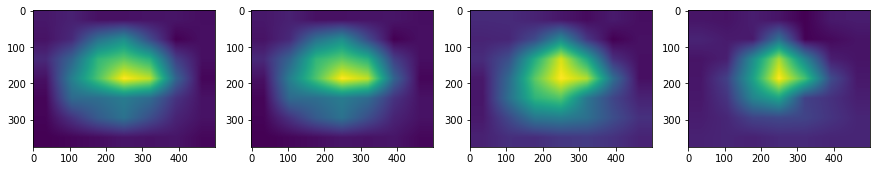

In [ ]:
plt.figure(figsize=(15,30))

plt.subplot(1, 4, 1)
grad_cam_image_conv = generate_grad_cam(cam_model, 'conv5_block3_3_conv', item)
plt.imshow(grad_cam_image_conv)

plt.subplot(1, 4, 2)
grad_cam_image_bn = generate_grad_cam(cam_model, 'conv5_block3_3_bn', item)
plt.imshow(grad_cam_image_bn)

plt.subplot(1, 4, 3)
grad_cam_image_add = generate_grad_cam(cam_model, 'conv5_block3_add', item)
plt.imshow(grad_cam_image_add)

plt.subplot(1, 4, 4)
grad_cam_image_out = generate_grad_cam(cam_model, 'conv5_block3_out', item)
plt.imshow(grad_cam_image_out)

plt.show()

- epoch=2Î°ú ÌïôÏäµÌïú Í≤ÉÏùÄ ÎÖ∏ÎûÄÏÉâÏúºÎ°ú Í∞ïÏïÑÏßÄÎ•º Ìè¨Ïª§Ïã±Ìïú ÏòÅÏó≠Ïù¥ ÎÑìÏóàÎäîÎç∞, epoch=8Î°ú ÌïôÏäµÌïú Î™®Îç∏ÏùÄ `add layer`Î•º Í±∞ÏπòÍ≥† ÎÇú Îí§ÏóêÎèÑ ÎπÑÍµêÏ†Å Í∞ïÏïÑÏßÄÎ•º Ïûò Ìè¨Ïª§Ïã±ÌïòÍ≥† ÏûàÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

3) ÏúÑÏóêÏÑú ÎßåÎì† Ïù¥ÎØ∏ÏßÄ `visualize_cam_on_image()` Ìï®ÏàòÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏãúÍ∞ÅÌôîÌï¥ Î≥¥ÏÑ∏Ïöî.

**‚òù epoch=2Î°ú ÌïôÏäµÌïú Î™®Îç∏ ÏÇ¨Ïö©**

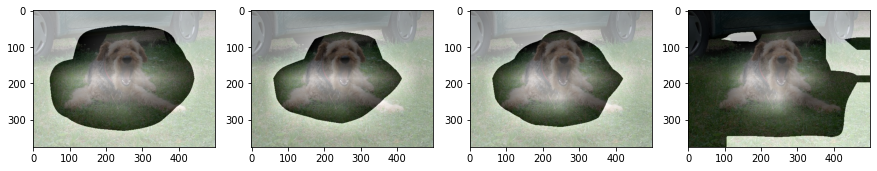

In [ ]:
origin_image = item['image'].astype(np.uint8)

plt.figure(figsize=(15,30))

plt.subplot(1, 4, 1)
grad_cam_image_conv_3channel = np.stack([grad_cam_image_conv*255]*3, axis=-1).astype(np.uint8)
blended_image_conv = visualize_cam_on_image(grad_cam_image_conv_3channel, origin_image)
plt.imshow(blended_image_conv)

plt.subplot(1, 4, 2)
grad_cam_image_bn_3channel = np.stack([grad_cam_image_bn*255]*3, axis=-1).astype(np.uint8)
blended_image_bn = visualize_cam_on_image(grad_cam_image_bn_3channel, origin_image)
plt.imshow(blended_image_bn)

plt.subplot(1, 4, 3)
grad_cam_image_add_3channel = np.stack([grad_cam_image_add*255]*3, axis=-1).astype(np.uint8)
blended_image_add = visualize_cam_on_image(grad_cam_image_add_3channel, origin_image)
plt.imshow(blended_image_add)

plt.subplot(1, 4, 4)
grad_cam_image_out_3channel = np.stack([grad_cam_image_out*255]*3, axis=-1).astype(np.uint8)
blended_image_out = visualize_cam_on_image(grad_cam_image_out_3channel, origin_image)
plt.imshow(blended_image_out)

plt.show()

- ÏúÑÏùò grad camÏóêÏÑú ÎÖ∏ÎûÄÏÉâÏúºÎ°ú ÌëúÏãúÎêú Î∂ÄÎ∂ÑÏù¥ labelÏùÑ ÌëúÏãúÌïòÎäî Í≤É Í∞ôÎã§

<br>

|Î≤àÌò∏|Î†àÏù¥Ïñ¥|ÏΩîÎ©òÌä∏|
|:---:|:---:|:---|
|1|`conv layer`|cam ÏÇ¨ÏßÑÏúºÎ°úÎäî ÏßëÏ§ëÎèÑ ÏûàÍ≤å Í∞ïÏïÑÏßÄÎ•º Ìè¨Ïª§Ïã±ÌïòÎäî ÎìØ ÌñàÎäîÎç∞, ÏÉùÍ∞ÅÎ≥¥Îã§ ÏòÅÏó≠ÏùÑ ÌÅ¨Í≤å Ïû°Ïùå|
|2|`bn layer`|Î∞∞Ïπò Ï†ïÍ∑úÌôî Ïù¥ÌõÑÏùò Î™®ÏäµÏù¥ Í∞ÄÏû• Í∞ïÏïÑÏßÄÎ•º Ïûò Ìè¨Ïª§Ïã± ÌïòÎäî ÎìØÌïòÎã§.|
|3|`add layer`|Ïù¥Ï†Ñ Î∏îÎü≠Ïùò `out layer`Ïùò outputÍ≥º ÎçîÌï¥ÏßÑ Î†àÏù¥Ïñ¥Ïó¨ÏÑú Îëê Î≤àÏß∏Î≥¥Îã§ ÏÇ¥Ïßù ÏòÅÏó≠Ïù¥ ÎÑìÏñ¥ÏßÑ ÎäêÎÇå|
|4|`out (activation) layer`|ÌôúÏÑ±Ìôî Ìï®Ïàò Ï†ÅÏö© Ïù¥ÌõÑÏùò Î†àÏù¥Ïñ¥Ïù∏Îç∞, Ï†úÎåÄÎ°ú Ìè¨Ïª§Ïã±ÏùÑ Î™ªÌïòÍ≥† ÏûàÎã§.|

**‚úå epoch=8Î°ú ÌïôÏäµÌïú Î™®Îç∏ ÏÇ¨Ïö©**

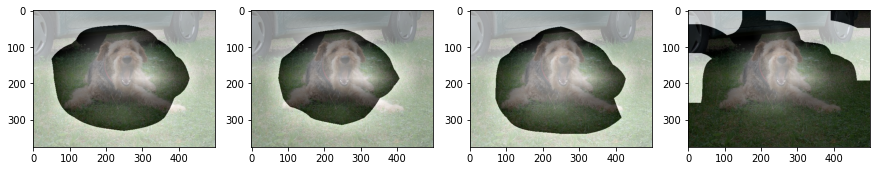

In [ ]:
origin_image = item['image'].astype(np.uint8)

plt.figure(figsize=(15,30))

plt.subplot(1, 4, 1)
grad_cam_image_conv_3channel = np.stack([grad_cam_image_conv*255]*3, axis=-1).astype(np.uint8)
blended_image_conv = visualize_cam_on_image(grad_cam_image_conv_3channel, origin_image)
plt.imshow(blended_image_conv)

plt.subplot(1, 4, 2)
grad_cam_image_bn_3channel = np.stack([grad_cam_image_bn*255]*3, axis=-1).astype(np.uint8)
blended_image_bn = visualize_cam_on_image(grad_cam_image_bn_3channel, origin_image)
plt.imshow(blended_image_bn)

plt.subplot(1, 4, 3)
grad_cam_image_add_3channel = np.stack([grad_cam_image_add*255]*3, axis=-1).astype(np.uint8)
blended_image_add = visualize_cam_on_image(grad_cam_image_add_3channel, origin_image)
plt.imshow(blended_image_add)

plt.subplot(1, 4, 4)
grad_cam_image_out_3channel = np.stack([grad_cam_image_out*255]*3, axis=-1).astype(np.uint8)
blended_image_out = visualize_cam_on_image(grad_cam_image_out_3channel, origin_image)
plt.imshow(blended_image_out)

plt.show()

- ÎßâÏÉÅ ÏãúÍ∞ÅÌôîÎ•º Ìï¥ Î≥¥Îãà epoch=2Î°ú ÌïôÏäµÌïú Î™®Îç∏Í≥º ÌÅ¨Í≤å Îã§Î•¥ÏßÄ ÏïäÏïÑ Î≥¥Ïù∏Îã§.

# Î∞îÏö¥Îî© Î∞ïÏä§ Íµ¨ÌïòÍ∏∞

1) Ï†úÏãúÎêú ÏΩîÎìúÎ•º Ï∞∏Í≥†Ìï¥, ÏßÅÏ†ë Grad-CAMÏúºÎ°ú ÏñªÏùÄ CAMÏùÑ ÌÜµÌï¥ÏÑú Î∞îÏö¥Îî© Î∞ïÏä§Î•º ÏñªÏñ¥Î≥¥ÏÑ∏Ïöî.


- ÏÉàÎ°úÏö¥ Ïù¥ÎØ∏ÏßÄÎ•º ÎΩëÎäîÎã§.

80


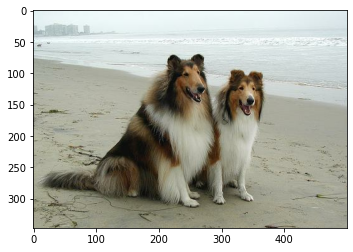

In [ ]:
item = get_one(ds_test)
print(item['label'])
plt.imshow(item['image'])
plt.show()

- Ïù¥Ï†Ñ Ïä§ÌÖùÏóêÏÑú ÏÇ¨Ïö©ÌñàÎçò `generate_grad_cam()`Ìï®ÏàòÎ•º Ïù¥Ïö©Ìï¥ÏÑú grad camÏù¥ÎØ∏ÏßÄÎ•º ÏÉùÏÑ±ÌïúÎã§.

**‚òù epoch=2Î°ú ÌïôÏäµÌïú Î™®Îç∏ ÏÇ¨Ïö©**


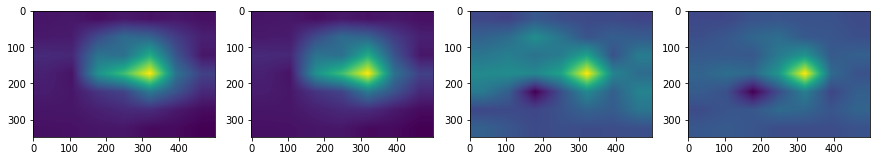

In [ ]:
grad_cam = []

grad_cam_image_conv = generate_grad_cam(cam_model, 'conv5_block3_3_conv', item)
grad_cam.append(grad_cam_image_conv)

grad_cam_image_bn = generate_grad_cam(cam_model, 'conv5_block3_3_bn', item)
grad_cam.append(grad_cam_image_bn)

grad_cam_image_add = generate_grad_cam(cam_model, 'conv5_block3_add', item)
grad_cam.append(grad_cam_image_add)

grad_cam_image_out = generate_grad_cam(cam_model, 'conv5_block3_out', item)
grad_cam.append(grad_cam_image_out)


plt.figure(figsize=(15,30))

for i, g in enumerate(grad_cam):
    plt.subplot(1, 4, i+1)
    plt.imshow(g)

    if i == len(grad_cam):
        plt.show()

**‚úå epoch=8Î°ú ÌïôÏäµÌïú Î™®Îç∏ ÏÇ¨Ïö©**

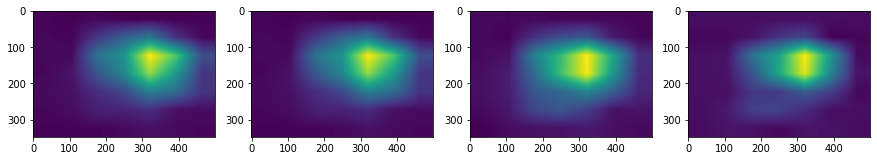

In [ ]:
grad_cam = []

grad_cam_image_conv = generate_grad_cam(cam_model, 'conv5_block3_3_conv', item)
grad_cam.append(grad_cam_image_conv)

grad_cam_image_bn = generate_grad_cam(cam_model, 'conv5_block3_3_bn', item)
grad_cam.append(grad_cam_image_bn)

grad_cam_image_add = generate_grad_cam(cam_model, 'conv5_block3_add', item)
grad_cam.append(grad_cam_image_add)

grad_cam_image_out = generate_grad_cam(cam_model, 'conv5_block3_out', item)
grad_cam.append(grad_cam_image_out)


plt.figure(figsize=(15,30))

for i, g in enumerate(grad_cam):
    plt.subplot(1, 4, i+1)
    plt.imshow(g)

    if i == len(grad_cam):
        plt.show()

- ÏïÑÎûò `get_bbox()` Ìï®ÏàòÎäî Î∞îÏö¥Îî© Î∞ïÏä§Î•º ÎßåÎì§Í∏∞ ÏúÑÌï¥ÏÑú `score_thresh`Î•º Î∞õÏïÑ Ïó≠ÏπòÍ∞í Ïù¥ÌïòÏùò Î∞îÏö¥Îî© Î∞ïÏä§Îäî ÏóÜÏï§Îã§.
- Í∑∏ Îã§Ïùå OpenCVÏùò `findContours()`ÏôÄ `minAreaRect()`Î°ú ÏÇ¨Í∞ÅÌòïÏùÑ Ï∞æÏïÑÏ§ÄÎã§.
- Ïù¥Îïå `rotated_rect` ÎùºÎäî ÌöåÏ†ÑÎêú Î∞îÏö¥Îî© Î∞ïÏä§Î•º ÏñªÏùÑ Ïàò ÏûàÎã§. 
- `boxPoints()`Î°ú Ïù¥Î•º Íº≠ÏßÄÏ†êÏúºÎ°ú Î∞îÍæ∏Ïñ¥ Ï§ÄÎã§.
- ÎßàÏßÄÎßâÏóêÎäî `int` ÏûêÎ£åÌòïÏúºÎ°ú Î≥ÄÌôòÌï¥ Ï§ÄÎã§.

In [ ]:
def get_bbox(cam_image, score_thresh=0.05):
    low_indicies = cam_image <= score_thresh
    cam_image[low_indicies] = 0
    cam_image = (cam_image*255).astype(np.uint8)
    
    contours,_ = cv2.findContours(cam_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    rotated_rect = cv2.minAreaRect(cnt)
    rect = cv2.boxPoints(rotated_rect)
    rect = np.int0(rect)
    return rect

print('Ïäù=3')

Ïäù=3


2) 1)ÏóêÏÑú ÏñªÏùÄ Î∞îÏö¥Îî© Î∞ïÏä§Î•º ÏãúÍ∞ÅÌôîÌï¥ Î≥¥ÏÑ∏Ïöî.

**‚òù epoch=2Î°ú ÌïôÏäµÌïú Î™®Îç∏ ÏÇ¨Ïö©**

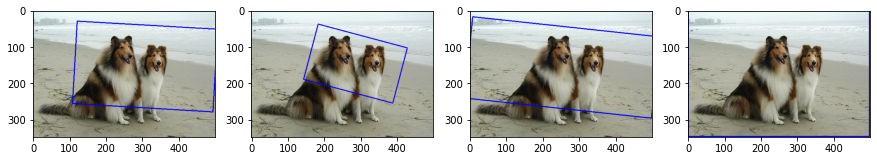

In [ ]:
plt.figure(figsize=(15, 30))

for i, g in enumerate(grad_cam):
    
    plt.subplot(1, 4, i+1)
    
    rect = get_bbox(g)
    image = copy.deepcopy(item['image'])
    image = cv2.drawContours(image, [rect], 0, (0,0,255), 2)
    plt.imshow(image)

    if i == len(grad_cam):
        plt.show() 

- Î∞îÏö¥Îî© Î∞ïÏä§ÏóêÏÑúÎèÑ Ïó¨Ï†ÑÌûà **Îëê Î≤àÏß∏** `bn layer`Í∞Ä Í∞ÄÏû• Ìè¨Ïª§Ïã±Ïù¥ Ïûò ÎêòÏñ¥ ÏûàÎã§.
- ÏïÑÏâ¨Ïö¥ Ï†êÏùÄ Îã§Î¶¨ÏôÄ Î™∏ÌÜµÍπåÏßÄ ÏôÑÎ≤ΩÌïòÍ≤å Ìè¨Ïª§Ïã±Îêú Ïù¥ÎØ∏ÏßÄÎäî ÏóÜÏóàÎã§Îäî Í≤É. Í∞ïÏïÑÏßÄÏùò ÏñºÍµ¥ÏùÑ ÏúÑÏ£ºÎ°ú Ìè¨Ïª§Ïã± ÌïòÎäî ÎìØ ÌïòÎã§.

- ÏòàÏ†ú Ïã§ÏäµÏóêÏÑú ÎßåÎì§Ïñ¥ Î≥¥ÏïòÎçò CAM Ïù¥ÎØ∏ÏßÄÎ°ú ÏñªÏùÄ Î∞îÏö¥Îî© Î∞ïÏä§Ïù¥Îã§.

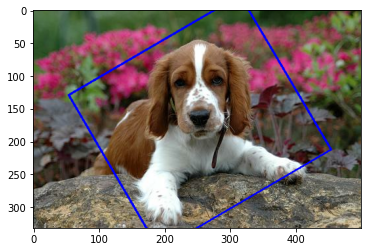

In [ ]:
image = copy.deepcopy(item['image'])
image = cv2.drawContours(image, [rect], 0, (0,0,255), 2)
plt.imshow(image)
plt.show()

- Ïò§ÌûàÎ†§ grad cam Î≥¥Îã§ Í∞ïÏïÑÏßÄ Î™∏ÌÜµ Ï†ÑÏ≤¥Î•º Îçî Ïûò Ïû°Í≥† ÏûàÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§. 
- Îã§Ïùå Ï±ïÌÑ∞ IoUÍµ¨ÌïòÍ∏∞ÏóêÏÑú ÏßÄÌëúÎ•º ÌôïÏù∏Ìï¥ Î≥¥ÏïÑÏïºÍ≤†Îã§.

**‚úå epoch=8Î°ú ÌïôÏäµÌïú Î™®Îç∏ ÏÇ¨Ïö©**

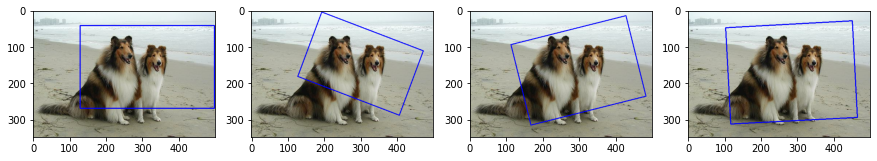

In [ ]:
plt.figure(figsize=(15, 30))

for i, g in enumerate(grad_cam):
    
    plt.subplot(1, 4, i+1)
    
    rect = get_bbox(g)
    image = copy.deepcopy(item['image'])
    image = cv2.drawContours(image, [rect], 0, (0,0,255), 2)
    plt.imshow(image)

    if i == len(grad_cam):
        plt.show() 

- epoch=2Î°ú ÌïôÏäµÌïú Î™®Îç∏ Î≥¥Îã§ Ìõ®Ïî¨ Îçî Ìè¨Ïª§Ïã±ÏùÑ Ïûò ÌïòÍ≥† ÏûàÎäî Î™®ÏäµÏù¥Îã§.
- ÌäπÌûà ÏÑ∏ Î≤àÏß∏, ÎÑ§Î≤àÏß∏Îäî epoch=2 Î™®Îç∏ÏóêÏÑúÎäî Í±∞Ïùò ÏÇ¨ÏßÑ Ï†ÑÏ≤¥Î•º Ïù∏ÏãùÌïòÎäîÍ≤å ÏïÑÎãåÍ∞Ä Ïã∂ÏùÑ Ï†ïÎèÑÏóàÎäîÎç∞, ÍΩ§ÎÇò Í∞ïÏïÑÏßÄÎ•º Ïûò ÌååÏïÖÌïòÍ≥† ÏûàÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.
- Îëê Î≤àÏß∏ `bn layer`Îäî epoch=2ÏóêÏÑúÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Í∞ïÏïÑÏßÄÏùò ÏñºÍµ¥Ïóê ÏßëÏ§ëÎèÑÍ∞Ä ÏûàÎäî ÎìØÌïòÎã§.

# IoU Íµ¨ÌïòÍ∏∞

1) **Ï†ïÎãµ Î∞îÏö¥Îî© Î∞ïÏä§(ground truth)ÏôÄ ÏòàÏ∏°Í∞í Î∞îÏö¥Îî© Î∞ïÏä§(prediction box)** Îëê Í∞ÄÏßÄÎ•º Ïù¥Ïö©Ìï¥ÏÑú IoUÎ•º Í≥ÑÏÇ∞ÌïòÎäî `get_iou()` Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥ Ï£ºÏÑ∏Ïöî.
```
def get_iou(gt_bbox, pred_bbox):
    iou = None
    # TODO: get iou between two bbox
    return iou
```



## Intersection Over Union

 Ï†ïÎãµ Îç∞Ïù¥ÌÑ∞Ïù∏ Î∞îÏö¥Îî© Î∞ïÏä§ÏôÄ camÏúºÎ°ú Íµ¨Ìïú Î∞îÏö¥Îî© Î∞ïÏä§Î•º Ïñ¥ÎñªÍ≤å ÎπÑÍµê, ÌèâÍ∞ÄÌï† Ïàò ÏûàÏùÑÍπå?

<br>

![](https://d3s0tskafalll9.cloudfront.net/media/images/GC-3-P-3.max-800x600.jpg)

<br>

- **IoU(Intersection over Union)**Îäî Îëê ÏòÅÏó≠Ïùò ÍµêÏßëÌï©Ïù∏ **intersection** ÏòÅÏó≠Ïùò ÎÑìÏù¥Î•º Îëê ÏòÅÏó≠Ïùò Ìï©ÏßëÌï©Ïù∏ **union** ÏòÅÏó≠ÏúºÎ°ú ÎÇòÎàÑÏñ¥Ï§Ä Í∞íÏù¥Îã§.
- Ïù¥Î•º ÌÜµÌï¥ Ï∞æÍ≥†Ïûê ÌïòÎäî Î¨ºÍ±¥Ïùò Ï†àÎåÄÏ†ÅÏù∏ Î©¥Ï†ÅÍ≥º ÏÉÅÍ¥ÄÏóÜÏù¥, <u>ÏòÅÏó≠ÏùÑ Ï†ïÌôïÌïòÍ≤å Ïûò Ï∞æÏïÑÎÇ¥ÏóàÎäîÏßÄÏùò ÏÉÅÎåÄÏ†ÅÏù∏ ÎπÑÏú®ÏùÑ Íµ¨Ìï† Ïàò ÏûàÏúºÎØÄÎ°ú,</u> Î™®Îç∏Ïù¥ ÏòÅÏó≠ÏùÑ Ïûò Ï∞æÏïòÎäîÏßÄ ÎπÑÍµêÌïòÎäî Ï¢ãÏùÄ ÏßÄÌëúÍ∞Ä ÎêúÎã§.


In [ ]:
# rectÏùò Ï¢åÌëúÎäî (x, y) ÌòïÌÉúÎ°ú, bboxÎäî (y_min, x_min, y_max, x_max)Ïùò normalized ÌòïÌÉúÎ°ú Ï£ºÏñ¥ÏßëÎãàÎã§. 
def rect_to_minmax(rect, image):
    bbox = [
        rect[:,1].min()/float(image.shape[0]),  #bounding boxÏùò y_min
        rect[:,0].min()/float(image.shape[1]),  #bounding boxÏùò x_min
        rect[:,1].max()/float(image.shape[0]), #bounding boxÏùò y_max
        rect[:,0].max()/float(image.shape[1]) #bounding boxÏùò x_max
    ]
    return bbox

print('Ïäù=3')

Ïäù=3


- ÏúÑÏóêÏÑú Íµ¨ÌñàÎçò `rect`Î•º minmax `bbox` ÌòïÌÉúÎ°ú ÏπòÌôòÌïúÎã§.

**‚òù epoch=2Î°ú ÌïôÏäµÌïú Î™®Îç∏ ÏÇ¨Ïö©**

In [ ]:
pred_bbox = []

for g in grad_cam:    
    rect = get_bbox(g)
    p_bbox = rect_to_minmax(rect, item['image'])    
    pred_bbox.append(p_bbox)

pred_bbox

[[0.08645533141210375, 0.216, 0.8011527377521613, 1.014],
 [0.10951008645533142, 0.288, 0.7319884726224783, 0.858],
 [0.05187319884726225, -0.032, 0.8501440922190202, 1.044],
 [0.0, 0.0, 0.9942363112391931, 0.996]]

**‚úå epoch=8Î°ú ÌïôÏäµÌïú Î™®Îç∏ ÏÇ¨Ïö©**

In [ ]:
pred_bbox = []

for g in grad_cam:    
    rect = get_bbox(g)
    p_bbox = rect_to_minmax(rect, item['image'])    
    pred_bbox.append(p_bbox)

pred_bbox

[[0.12103746397694524, 0.258, 0.7723342939481268, 0.996],
 [0.01440922190201729, 0.256, 0.8270893371757925, 0.946],
 [0.043227665706051875, 0.224, 0.9048991354466859, 0.966],
 [0.08357348703170028, 0.206, 0.8962536023054755, 0.93]]

- Ïù¥ Îç∞Ïù¥ÌÑ∞Ïùò ground truth bboxÎ•º ÌôïÏù∏Ìï¥ Î≥∏Îã§.

In [ ]:
item['objects']['bbox']

array([[0.19596542, 0.02      , 0.9048991 , 0.578     ],
       [0.26224783, 0.584     , 0.89048994, 0.736     ]], dtype=float32)

- CAM Ï∂îÎ°† Í≤∞Í≥ºÎ°ú ÏñªÏñ¥ÏßÑ bboxÏôÄ ground truth bboxÍ∞Ä ÏñºÎßàÎÇò Ïú†ÏÇ¨ÌïúÏßÄÎ•º IoUÎ•º Í≥ÑÏÇ∞Ìï¥ÏÑú ÌôïÏù∏Ìï¥ Î≥∏Îã§.

In [ ]:
def get_iou(boxA, boxB):
    y_min = max(boxA[0], boxB[0])
    x_min= max(boxA[1], boxB[1])
    y_max = min(boxA[2], boxB[2])
    x_max = min(boxA[3], boxB[3])
    
    interArea = max(0, x_max - x_min) * max(0, y_max - y_min)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou

print('Ïäù=3')

Ïäù=3


2) CAMÍ≥º Grad-CAMÏúºÎ°ú ÏñªÏùÄ Î∞îÏö¥Îî© Î∞ïÏä§ÏôÄ Ï†ïÎãµ Î∞îÏö¥Îî© Î∞ïÏä§ÏôÄÏùò IoUÎ•º Í∞ÅÍ∞Å ÎπÑÍµêÌï¥ Î¥ÖÏãúÎã§.

**‚òù epoch=2Î°ú ÌïôÏäµÌïú Î™®Îç∏ ÏÇ¨Ïö©**

- grad camÏúºÎ°ú Íµ¨Ìïú IoU



In [ ]:
for p_bbox in pred_bbox:
    iou = get_iou(p_bbox, item['objects']['bbox'][0])
    print(iou)

0.2933413588004529
0.2612764467660049
0.41038186778028823
0.39947618159625564


- IoU ÏßÄÌëúÎäî 1Ïóê Í∞ÄÍπåÏö∏ ÏàòÎ°ù Î∞îÏö¥Îî© Î∞ïÏä§Î•º Ïûò Ï∞æÏïòÎã§Í≥† Î≥º Ïàò ÏûàÎã§. (ÏòàÏ∏°Í∞íÍ≥º Ï†ïÎãµ Î∞ïÏä§Í∞Ä ÎßéÏù¥ Í≤πÏ≥êÏ†∏ÏûàÎã§Îäî ÎúªÏù¥Í∏∞ ÎïåÎ¨∏)
- ÏßÄÍ∏àÍπåÏßÄ Îëê Î≤àÏß∏, `bn layer`ÏóêÏÑú Í∞ÄÏû• Ìè¨Ïª§Ïã±Ïù¥ Ïûò ÎêòÏóàÎã§Í≥† ÎäêÍºàÏóàÎäîÎç∞, Ïò§ÌûàÎ†§ ÏßÄÏàòÎäî ÏÑ∏ Î≤àÏß∏ `add layer`ÏóêÏÑú Í∞ÄÏû• ÎÜíÏïòÎã§.
- Îã§Ïãú ÏÇ¨ÏßÑÏùÑ Î≥¥Îãà, `bn layer`ÏóêÏÑúÎäî ÏñºÍµ¥ÏùÑ Í∞ÄÍπùÍ≤å Ìè¨Ïª§Ïã±ÌïòÏó¨, ÏïÑÍπåÎèÑ Ïñ∏Í∏âÌñàÏóàÎçò Î™∏ÌÜµÏùÑ Ïûò Ïù∏ÏãùÌïòÏßÄ Î™ªÌïòÎäî Ï†ê ÎïåÎ¨∏Ïóê Í∞ïÏïÑÏßÄ bbox Î©¥Ï†ÅÍ≥ºÏùò ÍµêÏßëÌï©Ïù¥ Ï†ÅÏóàÎçò Í≤É Í∞ôÎã§.
- Î∞òÎ©¥ `add layer`ÏóêÏÑúÎäî Î∞∞Í≤ΩÏùÑ ÎÑìÍ≤å Ìè¨Ìï®ÌïòÍ≥† ÏûàÏñ¥ÏÑú Ïú°ÏïàÏúºÎ°ú Î≥¥Í∏∞ÏóêÎäî Ï†úÎåÄÎ°ú Ìè¨Ïª§Ïã±Ïù¥ ÏïàÎêú Í≤É Ï≤òÎüº ÎäêÍª¥Ï°åÏßÄÎßå, Ïò§ÌûàÎ†§ bboxÍ≥ºÏùò ÍµêÏßëÌï©ÏùÄ Îçî ÎßéÏïòÎçò Í≤ÉÏúºÎ°ú Ïù¥Ìï¥ÎêòÏóàÎã§.
- ÏÉùÍ∞ÅÎ≥¥Îã§ ÏßÄÌëúÍ∞Ä ÎÜíÍ≤å ÎÇòÏò® `out layer`ÎèÑ ÎßàÏ∞¨Í∞ÄÏßÄÎùºÍ≥† ÏÉùÍ∞ÅÌï®. ÌïòÏßÄÎßå `out laer`Îäî ÏàòÏπòÏÉÅÏúºÎ°ú ÎÜíÍ≤å ÎÇòÏôîÎã§Í≥† Ìï¥ÏÑú, `bn layer`Î≥¥Îã§ Îçî Ï†ïÌôïÌïú Ìè¨Ïª§Ïã±Ïù¥ Ïù¥Î£®Ïñ¥Ï°åÎã§Í≥†Îäî Ï†àÎåÄ ÎßêÌï† Ïàò ÏóÜÎã§Í≥† ÏÉùÍ∞ÅÌïúÎã§.

- ÏòàÏ†ú Ïã§ÏäµÏóêÏÑú camÏúºÎ°ú Íµ¨Ìïú IoU

In [ ]:
get_iou(pred_bbox, item['objects']['bbox'][0])

0.6199742123945472

- cam Î∞îÏö¥Îî© Î∞ïÏä§ ÏãúÍ∞ÅÌôîÏóêÏÑúÎèÑ Ïñ∏Í∏âÌñàÎìØÏù¥, grad camÏóêÏÑúÎ≥¥Îã§ Í∞ïÏïÑÏßÄÏùò ÏñºÍµ¥ ÎøêÎßå ÏïÑÎãàÎùº Î™∏ÌÜµÍπåÏßÄ Ïûò Ìè¨Ïª§Ïã±ÌïòÍ≥† ÏûàÏóàÎã§.
- ÏòàÏÉÅÌñàÎçò ÎåÄÎ°ú grad camÏùò IoUÎ≥¥Îã§ ÎÜíÏùÄ ÏàòÏπòÎ•º Î≥¥Ïù¥Í≥† ÏûàÎã§.

**‚úå epoch=8Î°ú ÌïôÏäµÌïú Î™®Îç∏ ÏÇ¨Ïö©**

In [ ]:
for p_bbox in pred_bbox:
    iou = get_iou(p_bbox, item['objects']['bbox'][0])
    print(iou)

0.26660445869110355
0.2698427280997174
0.3201123360240732
0.3600860416599793


- Ïú°ÏïàÏúºÎ°ú Î≥¥Í∏∞ÏóêÎäî epoch=2 Î™®Îç∏Î≥¥Îã§ Ìõ®Ïî¨ Í∞ïÏïÑÏßÄÎ•º Ïûò Ìè¨Ïª§Ïã±ÌïòÍ≥† ÏûàÎã§Í≥† ÏÉùÍ∞ÅÌïòÎäîÎç∞, Ï†ÑÏ≤¥Ï†ÅÏù∏ ÏßÄÌëúÍ∞Ä epoch=2 Î™®Îç∏Ïóê ÎπÑÌï¥ ÎÇÆÍ≤å ÎÇòÏôîÎã§.

# ÌöåÍ≥†

## ÏïåÍ≤åÎêú Ï†ê

### ÌïôÏäµÎêú Î™®Îç∏Ïùò ÏÑ∏Î∂ÄÏÇ¨Ìï≠ Î≥ÄÍ≤Ω

Í≥µÎ∂ÄÌïú ÎÇ¥Ïö©Ïù¥ÎùºÍ≥† ÌïòÍ∏∞Ïóî Í±∞Ï∞ΩÌïòÍ≥† ÏÉàÎ°ú ÏïåÍ≤åÎêú ÎÇ¥Ïö©ÏùÑ Ï†ïÎ¶¨ÌïòÏòÄÎã§.

<br>

- ÏßÄÎÇú ÌîÑÎ°úÏ†ùÌä∏ `CV-04`ÏóêÏÑú ResNet 50Ïóê shakedropÏùÑ ÏÇ¨Ïö©Ìï¥ Î≥¥Í≥† Ïã∂ÏóàÎäîÎç∞, Ïñ¥ÎñªÍ≤å Ï†ÅÏö©Ìï¥ÏïºÌï† ÏßÄ Î™∞ÎùºÏÑú Í∑∏ÎÉ• Í∏∞Î≥∏ ÏΩîÎìúÎßå ÏÇ¨Ïö©ÌïòÍ≥† Ï†úÏ∂úÌïòÏòÄÎã§.
- Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌïòÎ©¥ÏÑú Î≥¥Îãà, Ïù¥ÎØ∏ ÌïôÏäµÎêú Î™®Îç∏ÏóêÏÑúÎèÑ ÏÑ∏Î∂ÄÏ†ÅÏù∏ Í≤ÉÎì§ÏùÑ Î≥ÄÍ≤ΩÌï† Ïàò ÏûàÏóàÎã§.
- Ï£ºÎßêÏù¥ÎùºÎèÑ Ïù¥ ÏΩîÎìúÎ•º Ï∞∏Í≥†ÌïòÏó¨ ÌïúÎ≤à Îçî ÏãúÎèÑÌï¥ Î¥êÏïºÍ≤†Îã§Í≥† ÏÉùÍ∞ÅÌñàÎã§.
```
num_classes = ds_info.features["label"].num_classes
base_model = keras.applications.resnet50.ResNet50(
    include_top=False,     # Imagenet Î∂ÑÎ•òÍ∏∞  fully connected layer Ï†úÍ±∞
    weights='imagenet',
    input_shape=(224, 224,3),
    pooling='avg',      # GAPÎ•º Ï†ÅÏö©  
)
x = base_model.output
preds = keras.layers.Dense(num_classes, activation='softmax')(x)
cam_model = keras.Model(inputs=base_model.input, outputs=preds)
```


## Î£®Î∏åÎ¶≠ ÌèâÍ∞Ä ÏßÄÌëúÎ•º ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ ÏãúÎèÑÌïú Í≤ÉÎì§

|ÌèâÍ∞ÄÎ¨∏Ìï≠|ÏÉÅÏÑ∏Í∏∞Ï§Ä|
|:------|:---|
|1. CAMÏùÑ ÏñªÍ∏∞ ÏúÑÌïú Í∏∞Î≥∏Î™®Îç∏Ïùò Íµ¨ÏÑ±Í≥º ÌïôÏäµÏù¥ Ï†ïÏÉÅ ÏßÑÌñâÎêòÏóàÎäîÍ∞Ä?|ResNet50 + GAP + DenseLayer Í≤∞Ìï©Îêú CAM Î™®Îç∏Ïùò ÌïôÏäµÍ≥ºÏ†ïÏù¥ ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÏàòÎ†¥ÌïòÏòÄÎã§.|
|2. Î∂ÑÎ•òÍ∑ºÍ±∞Î•º ÏÑ§Î™Ö Í∞ÄÎä•Ìïú Class activation mapÏùÑ ÏñªÏùÑ Ïàò ÏûàÎäîÍ∞Ä?|CAM Î∞©ÏãùÍ≥º Grad-CAM Î∞©ÏãùÏùò class activation mapÏù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏñªÏñ¥ÏßÄÎ©∞, ÏãúÍ∞ÅÌôîÌïòÏòÄÏùÑ Îïå Ìï¥Îãπ objectÏùò Ï£ºÏöî ÌäπÏßï ÏúÑÏπòÎ•º Ïûò Î∞òÏòÅÌïúÎã§.|
|3. Ïù∏ÏãùÍ≤∞Í≥ºÏùò ÏãúÍ∞ÅÌôî Î∞è ÏÑ±Îä• Î∂ÑÏÑùÏùÑ Ï†ÅÏ†àÌûà ÏàòÌñâÌïòÏòÄÎäîÍ∞Ä?|CAMÍ≥º Grad-CAM Í∞ÅÍ∞ÅÏóê ÎåÄÌï¥ ÏõêÎ≥∏Ïù¥ÎØ∏ÏßÄÌï©ÏÑ±, Î∞îÏö¥Îî©Î∞ïÏä§, IoU Í≥ÑÏÇ∞ Í≥ºÏ†ïÏùÑ ÌÜµÌï¥ CAMÍ≥º Grad-CAMÏùò object localization ÏÑ±Îä•Ïù¥ ÎπÑÍµêÎ∂ÑÏÑùÎêòÏóàÎã§.|

- cam_modelÏö© ResNet 50ÏùÄ ÏòàÏ†úÏóêÏÑú Íµ¨ÌòÑÌïòÏó¨ ÌååÏùºÎ°ú Ï†ÄÏû•Ìïú Î™®Îç∏ **cam_model1.h5**ÏùÑ ÏÇ¨Ïö©ÌïòÏòÄÎã§.
- Ï≤òÏùåÏóêÎäî epoch=2Î°ú ÌïôÏäµÎêú Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏòÄÍ≥†, Îëê Î≤àÏß∏Î°úÎäî epoch=5Î°ú ÌïôÏäµÎêú Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏòÄÎã§.
- ÏãúÍ∞ÅÌôîÏôÄ ÏÑ±Îä• Î∂ÑÏÑùÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú, ÏùòÏô∏Î°ú grad cam Î≥¥Îã§ ÏùºÎ∞ò camÏù¥ Îçî Ï¢ãÏùÄ ÏÑ±Îä•Ïù¥ ÎÇòÏò® Í≤ÉÏù¥ Ïã†Í∏∞ÌñàÎã§.
- ÏûêÏÑ∏Ìïú Î∂ÑÏÑù Í≤∞Í≥ºÎäî Í∞Å Ï±ïÌÑ∞ ÎßêÎØ∏Ïóê Í∏∞Ïà†

## Ïñ¥Î†§Ïõ†Îçò Ï†ê

### 1. ÏΩîÎìú Î∂ÑÏÑù

Í∞ïÏÉÅÍ∂åÎãòÏùò ÏΩîÎìúÍ∞Ä ÎÑàÎ¨¥ Í∞ÄÎèÖÏÑ±Ïù¥ Îñ®Ïñ¥ÏßÑÎã§.

ÏÑ§Î™ÖÎèÑ ÏóÜÍ≥†, Í∑∏ÎÉ• Ìï®ÏàòÎ°ú Î≠âÌÉ±Ïù¥ÎêòÏñ¥ ÏûàÎäîÎç∞, ÌååÏù¥Ïç¨ÏùÑ Ïûò Î™ªÌï¥ÏÑú Í∑∏Îü∞ÏßÄ Ï§ëÍ∞Ñ Ï∂úÎ†•Ïù¥ Ïñ¥ÎñªÍ≤å ÎêòÎäîÏßÄ Ïù¥Ìï¥Î•º ÌïòÏßÄ Î™ªÌñàÎã§. 

ÌäπÌûà `def generate_cam(model, item)` Ìï®ÏàòÏùò ÏΩîÎìúÍ∞Ä ÎÑàÎ¨¥ Ìó∑Í∞àÎ†§ÏÑú... ÌïòÎÇòÌïòÎÇò Í≤ÄÏÉâÌïòÍ≥† Ï∂úÎ†• Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï¥Î≥¥ÎäêÎùº ÏãúÍ∞ÑÏù¥ ÎßéÏù¥ Í±∏Î†∏Îã§. 

ÏïÑÏßÅÏùÄ ÌååÏù¥Ïç¨ Ï¥àÎ≥¥Ïù∏Îç∞... ÏÑ§Î™ÖÎèÑ ÏïàÌï¥Ï£ºÍ≥† ÎÑàÎ¨¥ÌïúÍ±∞ ÏïÑÎãåÍ∞ÄÏöî ÏÉÅÍ∂åÎãò....


### 2. IoU ÏßÄÌëú

Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏Îäî Ïù¥Î°† ÎÇ¥Ïö©Ïù¥ Ïñ¥Î†µÏßÄÎäî ÏïäÏïòÏßÄÎßå, ÏßÄÌëúÏùò Í≤∞Í≥º Î∂ÑÏÑùÏóê ÏùòÏïÑÌï®Ïù¥ ÏûàÏóàÎã§.

<br>

ÌäπÌûà `epoch=2` Î™®Îç∏Í≥º `epoch=8`Î™®Îç∏Ïùò ÏÑ±Îä•Ï∞®Ïù¥Í∞Ä, Ïú°ÏïÖÏúºÎ°ú Î≥¥Í∏∞ÏóêÎäî `epoch=8`Î™®Îç∏Ïù¥ Ìõ®Ïî¨ Î°úÏª¨ÎùºÏù¥ÏßïÏùÑ Ïûò ÌñàÎã§Í≥† ÏÉùÍ∞ÅÌñàÎäîÎç∞, ÏàòÏπòÏÉÅÏúºÎ°úÎäî Í∑∏Î†áÏßÄ ÏïäÏïòÎã§.

<br>

Îî•Îü¨ÎãùÏùÑ Î∞∞Ïö∞Î©¥ÏÑú Ï¢ÖÏ¢Ö ÎäêÎÅºÍ≤å ÎêòÏßÄÎßå, Ïñ¥Îñ§ Î∂ÑÏÑùÏùÑÌïòÍ≥† Í≤∞Í≥ºÎ•º ÎèÑÏ∂úÌï¥ ÎÇº Îïå Î¨¥Ï°∞Í±¥ ÏÑ±Îä• ÏßÄÌëúÎßå Í≥†Î†§Ìï¥ÏÑú Í≤∞Î°†ÏùÑ ÎèÑÏ∂úÌï¥ÏÑúÎäî ÏïàÎê† Í≤É Í∞ôÎã§Îäî ÏÉùÍ∞ÅÏù¥ Îì§Í≥§ÌïúÎã§.

<br>

ÌäπÌûà Í≥†Í∞ù ÏÑúÎπÑÏä§Î•º Ï†úÍ≥µÌïòÎäî ÏóÖÎ¨¥Î•º Îß°Í≤å ÎêúÎã§Î©¥, ÏßÄÍ∏àÏ≤òÎüº ÏÇ¨ÎûåÏùò Ïú°ÏïàÏúºÎ°úÎäî Ïò§ÌûàÎ†§ ÏÑ±Îä•Ïù¥ Îñ®Ïñ¥Ï†∏ Î≥¥Ïù¥Îäî Í≤∞Í≥ºÍ∞Ä ÏÑ±Îä• ÏßÄÌëúÏùò ÏàòÏπòÏÉÅÏúºÎ°úÎäî Îçî Ï¢ãÍ≤å ÎÇòÌÉÄÎÇòÎäî Í≤ΩÏö∞Îäî Ïñ¥Îñ§ÏãùÏúºÎ°ú ÏÑúÎπÑÏä§Î•º Ï†úÍ≥µÌïòÍ≥† Í≥†Í∞ùÏùÑ ÏÑ§ÎìùÏãúÌÇ¨ Ïàò ÏûàÎäîÏßÄÎ•º Í≥†ÎØºÌï¥ Î≥º ÌïÑÏöîÍ∞Ä ÏûàÏùÑÎìØÌïòÎã§.

<br>

Ïù∏Í≥µÏßÄÎä•ÏùÑ Î∞∞Ïö∞Îäî ÎÇòÏùò ÏûÖÏû•ÏóêÏÑúÎäî ÎÖºÎ¶¨Ï†ÅÏúºÎ°ú Ïú°ÏïàÏúºÎ°ú Î≥¥Í∏∞ÏóêÎäî ÏïàÏ¢ãÏïÑÎ≥¥Ïù¥ÏßÄÎßå, Ïù¥Îü¨Ï†ÄÎü¨Ìïú Ïù¥Ïú†Î°ú ÏÑ±Îä•Ïù¥ Îçî Ï¢ãÎã§Îäî ÏÑ§Î™ÖÏùÑ Îì£ÎäîÎã§Î©¥ ÎÇ©ÎìùÌïòÍ≥† Í≥µÎ∂ÄÌï† Ï£ºÏ†úÍ∞Ä ÎêòÏßÄÎßå, Í≥†Í∞ùÎì§ÏùÄ Í∑∏Îü∞ ÏÑ§Î™ÖÏùÑ Í∏∞Í∫ºÏõåÌïòÏßÄ ÏïäÏùÑÏßÄÎèÑ Î™®Î•∏Îã§.<br>
Ïò§ÌûàÎ†§ Í∑∏Îü∞ Í≥†Í∞ùÎì§ÏùÑ ÏÑ§ÎìùÏãúÌÇ§Îäî ÎåÄÏã†, ÏùºÎ∂ÄÎü¨ ÏÑ±Îä• ÏßÄÌëúÍ∞Ä ÎÇÆÏùÄ Î™®Îç∏ÏùÑ Ï†ÅÏö©ÏãúÏºúÏïºÌñàÎçò ÏÇ¨Î°ÄÎèÑ ÏûàÏùÑ Í≤ÉÏù¥ÎùºÎäî ÏÉùÍ∞ÅÎèÑ ÌïòÍ≤å ÎêòÏóàÎã§.

<br>

ÌîÑÎ°úÏ†ùÌä∏ÏôÄ Í¥ÄÎ†®Îêú Ïó¨Îü¨ ÎπÑÏßÄÎãàÏä§ ÏºÄÏù¥Ïä§Îì§ÎèÑ Ï†ëÌï¥Î≥º Í∏∞ÌöåÍ∞Ä ÏûàÎã§Î©¥ Ï¢ãÍ≤†Îã§.(Íº≠ Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏ÏôÄ Í¥ÄÎ†®Îêú ÏºÄÏù¥Ïä§Í∞Ä ÏïÑÎãàÎùºÎèÑ!)

## I wish...

![](https://images.velog.io/images/seona056/post/b47e596f-c965-49bd-9b5a-75c582aac020/image.png)

Ïù¥Ï†ú Í∑∏Îßå ÎÇòÏôÄÏ£ºÏÑ∏Ïöî
